In [249]:
import os
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import re
import copy

In [674]:
filename = 'output.txt'
file = open(filename,'rt')
inputParam = []
for line in file:
    for word in line.split():
        inputParam.append(int(word))
file.close()
#print(inputParam)


In [675]:
class Process:
    def __init__(self,Number,Arrival_time, Burst_time , Priority,Turn_around = None,Waiting_time =None):
        self.Number = Number
        self.Arrival_time = Arrival_time
        self.Burst_time = Burst_time
        self.Priority = Priority

num = inputParam[0]
Processes = []
for i in range (num):
    Processes.append(Process(inputParam[1+i*4],inputParam[2+i*4],inputParam[3+i*4],inputParam[4+i*4]))

for x in Processes:
    print(x.Number,x.Arrival_time,x.Burst_time,x.Priority)

1 5 5 6
2 11 9 3


In [676]:
def DrawPlot(start,widthx,heighty,labels,title):
    #objects = ['No Process','P1', 'P2', 'P3', 'P4']
    plt.bar(x = start, height = heighty, width = widthx, align='edge', alpha=0.4)
    plt.yticks(np.arange(0,max(heighty)+1,1), labels)
    plt.ylabel('Processes')
    plt.xlabel('Time')
    plt.title(title)
    plt.show()

In [677]:
def FCFS(P_arr,cstime = None):
    i=0
    P_arr.sort(key=lambda x: x.Arrival_time)         
    start = np.array([P_arr[0].Arrival_time])         # start array contain execution start time for every process
    exc_time = np.array([P_arr[0].Burst_time])        # exc_time array contain execution time for each process
    arrival_time = np.array([P_arr[0].Arrival_time]) # arrival_time array contain arrival time for each process
    t = start[0] + P_arr[0].Burst_time
    heights = [P_arr[0].Number]                      #Carry the ID for each process
    for x in P_arr:
        if i == 0:
            i = i+1
            continue
        if t > x.Arrival_time:
            start = np.append(start,t)
        else:
            start = np.append(start,x.Arrival_time)

        exc_time = np.append(exc_time,x.Burst_time)
        t = max(t,x.Arrival_time) + x.Burst_time
        arrival_time = np.append(arrival_time,x.Arrival_time)
        heights.append(x.Number)
    turn_around = start + exc_time - arrival_time
    labels =[]                                       # labels for processes
    for i in range (len(P_arr)+1):
        if i ==0:
            labels.append("No process")
        else:
            labels.append("P" + str(i))

    DrawPlot(start,exc_time,heights,labels,"FCFS")
    filename = 'FCFS.txt'
    file = open(filename,'w+')
    print("Waiting time for each process              -> ",start,"\n",file=file)
    print("Turn around time for each process          -> ",turn_around,"\n",file=file)
    print("Weighted Turn around time for each process -> ",turn_around/exc_time,"\n",file=file)
    print("Average Turn around time                   -> ",np.mean(turn_around),"\n",file=file)
    print("Average weighted Turn around time          -> ",np.mean(turn_around/exc_time),file=file)
    file.close()


In [678]:
def HPF(P_arr,cstime = None):
    i=0
    P_arr.sort(key=lambda x: x.Priority)         
    start =np.array([P_arr[0].Arrival_time])         # start array contain execution start time for every process
    exc_time =np.array([P_arr[0].Burst_time])        # exc_time array contain execution time for each process
    arrival_time = np.array([P_arr[0].Arrival_time]) # arrival_time array contain arrival time for each process
    t = start[0]+ P_arr[0].Burst_time
    heights = [P_arr[0].Number]
    for x in P_arr:
        if i == 0:
            i = i+1
            continue
        if t > x.Arrival_time:
            start = np.append(start,t)
        else:
            start = np.append(start,x.Arrival_time)

        exc_time = np.append(exc_time,x.Burst_time)
        t = max(t,x.Arrival_time) + x.Burst_time
        arrival_time = np.append(arrival_time,x.Arrival_time)
        heights.append(x.Number)
    turn_around = start + exc_time - arrival_time
    labels =[]                                       # labels for processes
    for i in range (len(P_arr)+1):
        if i ==0:
            labels.append("No process")
        else:
            labels.append("P" + str(i))

    DrawPlot(start,exc_time,heights,labels,"HPF")
    filename = 'HPF.txt'
    file = open(filename,'w+')
    print("Waiting time for each process              -> ",start,"\n",file=file)
    print("Turn around time for each process          -> ",turn_around,"\n",file=file)
    print("Weighted Turn around time for each process -> ",turn_around/exc_time,"\n",file=file)
    print("Average Turn around time                   -> ",np.mean(turn_around),"\n",file=file)
    print("Average weighted Turn around time          -> ",np.mean(turn_around/exc_time),file=file)
    file.close()

In [679]:
def Calc_WT_TAT_WTAT(P_arr,start,heights,exc_time):
    
    arrival_time = []
    for x in P_arr:
            arrival_time = np.append(arrival_time,x.Arrival_time)
    st = []
    for i in range(len(P_arr)): #First call for ID in heights is the start time for process
        for j in range(0, len(heights)):
            if(heights[j] == i+1):
                st = np.append(st,start[j])
                break
    Waiting_time = st - arrival_time
    
    end = []
    for i in range(len(P_arr)): #Last call for ID in heights carry the end time for process
        for j in range(len(heights)-1, -1,  -1):
            if(heights[j] == i+1):
                end = np.append(end,start[j] + exc_time[j])
                break
    turn_around = end - arrival_time
    
    weighted_turn_around = np.copy(turn_around)
    for i in range(len(P_arr)):
            weighted_turn_around[i] = weighted_turn_around[i] / P_arr[i].Burst_time
    
    return [Waiting_time, turn_around, weighted_turn_around]

def initialize(P_arr):
    Processes = copy.deepcopy(P_arr)
    Processes.sort(key=lambda x: x.Arrival_time)
    
    ll = [Processes[0]]
    start = np.array([Processes[0].Arrival_time]); t = Processes[0].Arrival_time
    exc_time = []
    heights = []; last_id = Processes[0].Number; exc = 0
    
    return [Processes,start,exc_time,heights,ll,exc,t,last_id]

def add_cs(start, exc_time, heights,csid,cstime):
    heights = np.append(heights,csid) #ID for context switching
    exc_time = np.append(exc_time,cstime);
    start = np.append(start,start[len(start)-1]+exc_time[len(start)-1])
    return [start, exc_time, heights]

def label_processes(num):
    
    labels =[]                                       # labels for processes
    
    for i in range (num+1):
        if i ==0:
            labels.append("No process")
        else:
            labels.append("P" + str(i))
    
    labels.append("CS")
    
    return labels

def write_file(filename,waiting_time,turn_around,weighted_turn_around):
    file = open(filename,'w+')
    print("Waiting time for each process              -> ",waiting_time,"\n",file=file)
    print("Turn around time for each process          -> ",turn_around,"\n",file=file)
    print("Weighted Turn around time for each process -> ",weighted_turn_around,"\n",file=file)
    print("Average Turn around time                   -> ",np.mean(turn_around),"\n",file=file)
    print("Average weighted Turn around time          -> ",np.mean(weighted_turn_around),file=file)
    file.close()

In [680]:
def SJF(ll, start, exc_time, heights,csid,cstime):
    flag = len(ll) > 0
        
    while(len(ll)>0):
        #For process
        start = np.append(start,start[len(start)-1]+exc_time[len(start)-1])
        heights = np.append(heights,ll[0].Number)
        exc_time = np.append(exc_time,ll[0].Burst_time)
        
        ll.pop(0)
    
    return [start,exc_time,heights]
    
def SRTN(P_arr,cstime = 1):
    
    Processes, start, exc_time, heights, ll, exc, t, last_id = initialize(P_arr) 
    
    i=1
    while(i<len(P_arr)):
        flag2 = False  
        #Check if i will take new processes with me at this time (t)
        while(i < len(P_arr) and Processes[i].Arrival_time <= t): #ِGet the processes arrived at that time
            ll.append(Processes[i])
            i = i +1
        
        #If i have processes in this time
        if len(ll) > 0:
            ll.sort(key=lambda x: x.Burst_time)
            ll[0].Burst_time = ll[0].Burst_time - 1
            
            # If i picked the same process
            if(last_id == ll[0].Number):
                exc = exc + 1
            else:
                heights = np.append(heights,last_id); exc_time = np.append(exc_time,exc)
                
                #if there is context switching happened
                if(ll[0].Arrival_time < start[len(start)-1] + exc): 
                    start, exc_time, heights = add_cs(start, exc_time, heights,len(P_arr)+1,cstime)
                    t = t + cstime
           
                exc = 1; last_id = ll[0].Number    
                start = np.append(start,t)  #wrong
              
            if(ll[0].Burst_time == 0):
                ll.pop(0)
                flag2 = True
            t = t + 1
        elif (i < len(P_arr)):
            t = Processes[i].Arrival_time
    
    #Finish last process I Got
    if(len(ll)>0):
        heights = np.append(heights,last_id); exc_time = np.append(exc_time,exc)
        #To handle Specific case like (1 5 2 and 2 6 9)
        if(ll[0].Number != heights[len(start)-1] and (not flag2)): #there is context switching happened
                start, exc_time, heights = add_cs(start, exc_time, heights,len(P_arr)+1,cstime)
    else:
        start = np.delete(start,len(start)-1) #No need for it
    
    start,exc_time,heights = SJF(ll, start, exc_time, heights,len(P_arr)+1,cstime) #Continue with shortest job first
        
    labels = label_processes(len(P_arr)) #labels for processes
    
    DrawPlot(start,exc_time,heights,labels,"SRTN")
    
    waiting_time, turn_around, weighted_turn_around = Calc_WT_TAT_WTAT(P_arr,start,heights,exc_time)
    
    write_file('SRTN.txt',waiting_time,turn_around,weighted_turn_around)

In [681]:
def cont(ll, start, exc_time, heights,csid,cstime,quantum,t):
    
    flag2 = False
    
    if(len(start)==0 and len(ll)>0): #handle special case
        flag2 = True
        start = np.append(start,0)
        heights = np.append(heights,0)
        exc_time = np.append(exc_time,ll[0].Arrival_time)
        
    while(len(ll)>0):
        #For process
        start = np.append(start,t)
        heights = np.append(heights,ll[0].Number)
        exc_time = np.append(exc_time,min(quantum,ll[0].Burst_time))
        ll[0].Burst_time = ll[0].Burst_time - min(quantum,ll[0].Burst_time)
        t = t + exc_time[len(exc_time)-1]
        
        if(ll[0].Burst_time > 0):
                ll.insert(len(ll),ll[0])
            
        #For Context_switching
        if(len(ll)>2 and ll[0].Number == ll[len(ll)-1].Number): #there is context switching happened
            start, exc_time, heights = add_cs(start, exc_time, heights,csid,cstime)
            t = t + cstime
                    
        ll.pop(0)
    
    if(flag2): #handle special case
        start = np.delete(start,0) #No need for it
        exc_time = np.delete(exc_time,0) #No need for it
        heights = np.delete(heights,0) #No need for it
        
    return [start,exc_time,heights]
    

def RR(P_arr,cstime = 1,quantum = 1):
    
    Processes, start, exc_time, heights, ll, exc, t, last_id = initialize(P_arr) 
    
    i=1
    while(i < len(P_arr) and Processes[i].Arrival_time <= t): #ِGet the processes arrived at that time
            ll.append(Processes[i])
            i = i+1
    
    flag = False
    while(i<len(P_arr)):
        flag = True
        
        #If i have processes in this time
        if len(ll) > 0:
            temp = min(quantum,ll[0].Burst_time)
            # If i picked the same process
            if(last_id == ll[0].Number):
                exc = exc + min(quantum,ll[0].Burst_time)
                ll[0].Burst_time = ll[0].Burst_time - min(quantum,ll[0].Burst_time)
            else:
                ll[0].Burst_time = ll[0].Burst_time - min(quantum,ll[0].Burst_time)
                heights = np.append(heights,last_id); exc_time = np.append(exc_time,exc)
                
                #if there is context switching happened
                if(ll[0].Arrival_time <= start[len(start)-1] + exc and ll[len(ll)-1].Number == last_id): 
                    start, exc_time, heights = add_cs(start, exc_time, heights,len(P_arr)+1,cstime)
                    t = t + cstime
                elif(ll[0].Arrival_time < start[len(start)-1] + exc and ll[len(ll)-1].Number == last_id): 
                    start, exc_time, heights = add_cs(start, exc_time, heights,len(P_arr)+1,cstime)
                    t = t + cstime
           
                exc = min(quantum,ll[0].Burst_time); last_id = ll[0].Number    
                start = np.append(start,t)  #wrong

            t = t + temp
            
            #Check if i will take new processes with me at this time (t)
            while(i < len(P_arr) and Processes[i].Arrival_time <= t): #ِGet the processes arrived at that time
                ll.append(Processes[i])
                i = i + 1
            
            if(ll[0].Burst_time > 0):
                ll.insert(len(ll),ll[0])
            ll.pop(0)
            
        elif (i < len(P_arr)):
            t = Processes[i].Arrival_time
            while(i < len(P_arr) and Processes[i].Arrival_time <= t): #ِGet the processes arrived at that time
                ll.append(Processes[i])
                i = i + 1
    
    #Finish last process I Got
    if(len(ll)>0 and flag):
        heights = np.append(heights,last_id); exc_time = np.append(exc_time,exc)
        #To differ between those cases (1 5 2 and 2 6 9) and (1 5 2 and 2 7 9)
        if(ll[0].Number == heights[len(heights)-1]):
            ll.insert(len(ll),ll[0])
            ll.pop(0)
        elif(ll[len(ll)-1].Number == last_id):
            start, exc_time, heights = add_cs(start, exc_time, heights,len(P_arr)+1,cstime)
            t = t + cstime
    else:
        start = np.delete(start,len(start)-1) #No need for it

    start,exc_time,heights = cont(ll, start, exc_time, heights,len(P_arr)+1,cstime,quantum,t) #Continue with shortest job first
        
    labels = label_processes(len(P_arr)) #labels for processes
    
    DrawPlot(start,exc_time,heights,labels,"RR")
    
    waiting_time, turn_around, weighted_turn_around = Calc_WT_TAT_WTAT(P_arr,start,heights,exc_time)
    
    write_file('RR.txt',waiting_time,turn_around,weighted_turn_around)

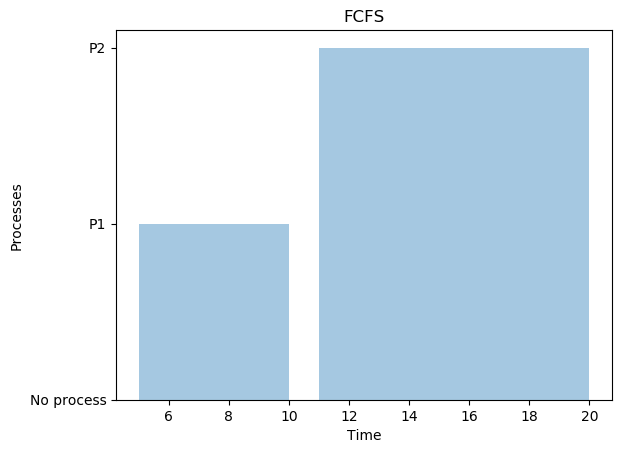

In [682]:
P_arr = copy.deepcopy(Processes)

FCFS(P_arr)

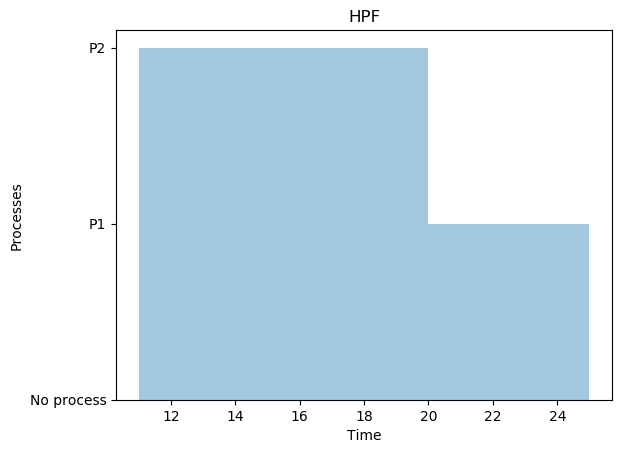

In [683]:
P_arr = copy.deepcopy(Processes)

HPF(P_arr)

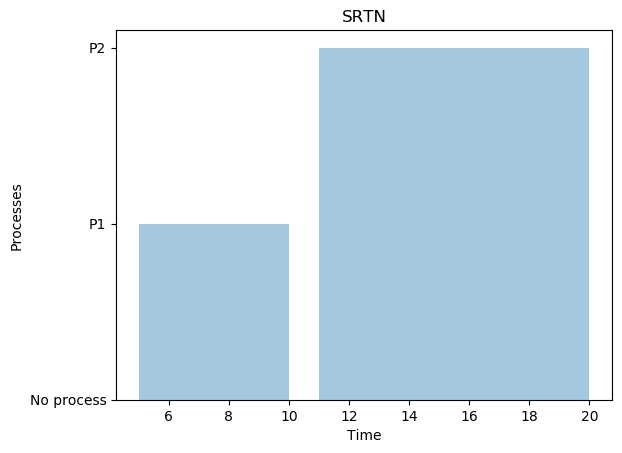

In [684]:
P_arr = copy.deepcopy(Processes)

SRTN(P_arr,3)

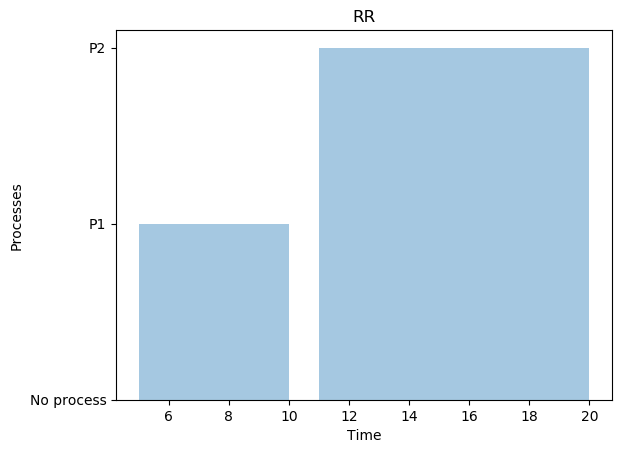

In [685]:
P_arr = copy.deepcopy(Processes)

RR(P_arr,2,2)